## Section I - Plots

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

df = pd.read_csv('../data/data_complete.csv')

In [5]:
df['source'].unique()

array(['osdg', 'hal', 'UN', 'scraped', 'paper'], dtype=object)

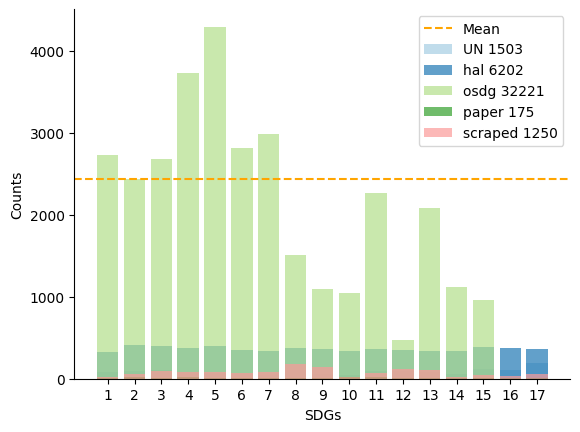

In [16]:
# group and count text apperances of sdg and source column values in df
sdg_counts = df.groupby(['sdg', 'source']).count()['text'].unstack().fillna(0)

fig, ax = plt.subplots()

ax.set_xlabel("SDGs")
ax.set_ylabel("Counts")


# add average line
mean = sdg_counts.values.sum() / 17
ax.axhline(mean, label="Mean", color="orange", linestyle="--")

# set color palette
colors = sns.color_palette("Paired", n_colors=len(sdg_counts.columns))

# plot each source as a separate bar plot with a different color
for i, col in enumerate(sdg_counts.columns):
    ax.bar(sdg_counts.index, sdg_counts[col], width=0.8, color=colors[i % len(colors)], alpha=0.7, label=f"{col} {int(sdg_counts[col].sum())}")

ax.legend()

# remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set xticks for each SDG
plt.xticks(sdg_counts.index)

# save plot as pdf
# plt.savefig('./plots/sdg_counts.pdf', bbox_inches='tight')

plt.show()


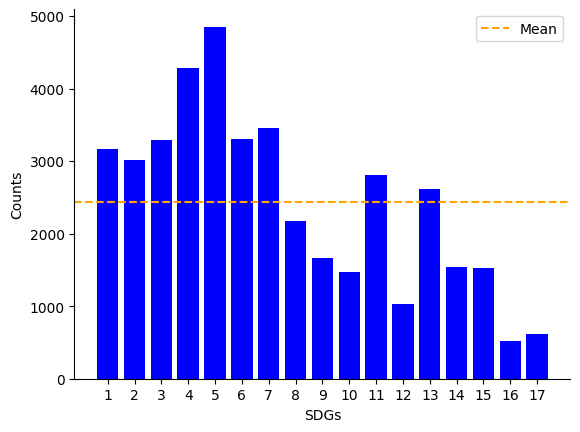

In [17]:
# Group and count text appearances of 'sdg' column values in df
sdg_counts = df.groupby('sdg').count()['text'].to_frame().rename(columns={'text': 'count'})

# Create a new figure and axis object
fig, ax = plt.subplots()

# Set axis labels
ax.set_xlabel("SDGs")
ax.set_ylabel("Counts")

# Add average line to the plot
mean = sdg_counts["count"].mean()
ax.axhline(mean, label="Mean", color="orange", linestyle="--")

# Add legend to the plot
ax.legend()

# Set the x-tick labels to the SDG values
plt.xticks(sdg_counts.index)

# Plot a bar chart of the count values for each SDG
plt.bar(sdg_counts.index, sdg_counts["count"], width=0.8, color="blue")

# Remove the top and right borders from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot as a PDF file (optional)
# plt.savefig('./plots/sdg_counts.pdf', bbox_inches='tight')

# Display the plot
plt.show()


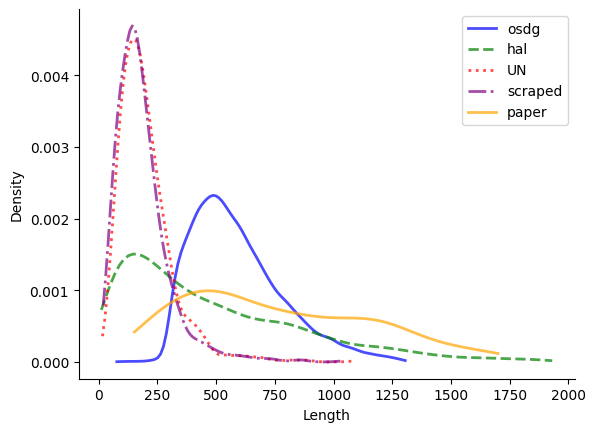

In [14]:
df['length'] = df['text'].str.len()

# define a list of colors and linestyles
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['-', '--', ':', '-.', '-', '--']

# get the unique sources in the dataframe
sources = df['source'].unique()

# create a figure and axis object
fig, ax = plt.subplots()

# loop through each source and plot the kde with a different color and linestyle
for i, source in enumerate(sources):
    subset = df[df['source']==source]
    lengths = subset['length']
    kde = gaussian_kde(lengths)
    x = np.linspace(lengths.min(), lengths.max(), 100)
    ax.plot(x, kde(x), label=source, linestyle=linestyles[i % len(linestyles)], linewidth=2, color=colors[i % len(colors)], alpha=0.7, zorder=10)

# set axis labels and legend
ax.set_xlabel('Length')
ax.set_ylabel('Density')
ax.legend()

#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#save plot as pdf
# plt.savefig('./plots/length_distribution.pdf', bbox_inches='tight')

# display the plot
plt.show()
